# Resampling tutorial

In [8]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [9]:
# First it's always good to pick a good test statistic
group1 = [0.4, 0.43, 0.5, 0.1, 0.2, 0.51, 0.35, 0.32, 0.51]
group2 = [0.1, 0.1, 0.38, 0.15, 0.11, 0.2, 0.5, 0.2, 0.63]


In [11]:
# Do ttest
stats.ttest_ind(group1, group2)

Ttest_indResult(statistic=1.3105318371484331, pvalue=0.20851727494328842)

In [12]:
num_total = len(group1) + len(group2)


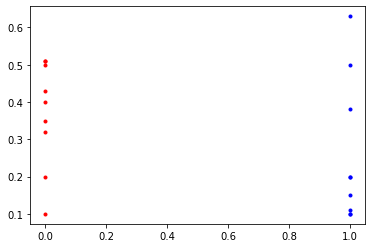

In [20]:
plt.plot(np.zeros(len(group1)), group1, 'r.')
plt.plot(np.ones(len(group2)), group2, 'b.')

# There's always 2 steps to resampling.
### 1) Define a test statistic, this is something you do to all of the data.
#### E.g. a difference of means => mean1 - mean2
### 2) Run the permutation test!

In [40]:
# step 1: define a test statistic
def test_statistic(group1_in, group2_in):
    diff_of_means = np.abs(np.mean(group1_in) - np.mean(group2_in))
    return diff_of_means

In [41]:
# step 2: run the permutation test
combined = np.array(group1 + group2)
num_resamples = 10000

distro = []
for i in range(num_resamples):
    
    rand_order = np.random.permutation(len(combined))
    test_group_1 = np.random.choice(combined, size=len(combined//2))
    test_group_2 = np.random.choice(combined, size=len(combined//2))
    distro.append(test_statistic(test_group_1, test_group_2))

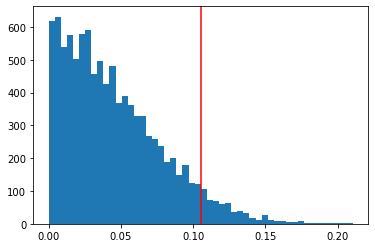

In [42]:
# visualize permutation
plt.hist(distro, bins=50)
plt.axvline(test_statistic(group1, group2), color='r')

In [43]:
# calculate how many samples are at least as big as your result
myteststatistic = test_statistic(group1, group2)
distro_arr = np.array(distro)

# p value is the number of occurances at least as big
p = np.sum(distro_arr > myteststatistic)  / len(distro_arr)
print('p={}'.format(p))

p=0.0596
